In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import jax.numpy as jnp
import jax

In [2]:
import lib

In [3]:
ns=60000
nd=1
rho=1
bias = 3.0 
ndR = 1
kappa = 2.32635
n_votes = 1
vote_th = 0.0
# la = 0.61310
# beta = 13.6868·

# ns=300
# nd=200
# bias = 2.32635
# # ndR = 10
# n_votes = 3
# kappa = 3.
# la = 0.445556
# # # beta = 11.5

decay_steps = 30000
n_tested_patterns = 500
initial_steps = 5000

seed = 238
rng = np.random.default_rng(seed)

# neuron = lib.Neuron10_2(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, ndR=ndR, beta=beta, seed=rng.integers(100000))
neuron = lib.Neuron3_2(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, ndR=ndR, n_votes=n_votes, vote_th=vote_th, seed=rng.integers(100000))
# neuron = lib.Neuron4_2(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, la=la, n_votes=n_votes, seed=rng.integers(100000))

# xs_gen = lib.Xs_Generator1(normalized_len=-1, seed=rng.integers(100000))
xs_gen = lib.Xs_Generator3_1(nd, ns, rho, normalized_len=np.sqrt(ns), seed=rng.integers(100000))

simulation_run = lib.Simulation_Run2(neuron, xs_gen, decay_steps=decay_steps, initial_steps=initial_steps, n_tested_patterns=n_tested_patterns, refresh_every=500, seed=rng.integers(100000))

I0000 00:00:1697347034.269734   23538 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


In [4]:
simulation_run.run()

  0%|          | 0/30500 [00:00<?, ?it/s]

100%|██████████| 30500/30500 [01:11<00:00, 424.94it/s]


In [5]:
upper99_1 = jnp.mean(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.99), decay_steps-10000:decay_steps])
mean_1_init = jnp.mean(simulation_run.votes_record, axis=0)[0]
print(upper99_1)
print(mean_1_init)

2.2850916
5.325131


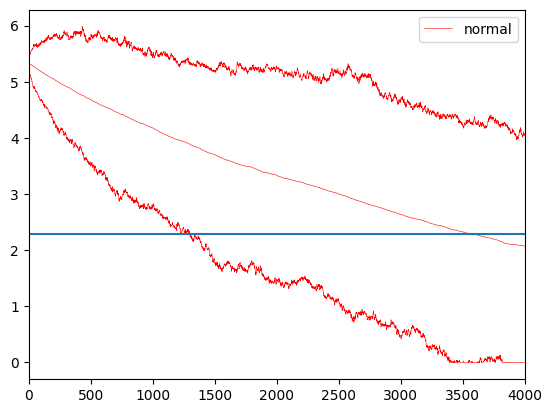

In [6]:
plt.plot(np.mean(simulation_run.votes_record, axis=0)[:decay_steps], c="red", linewidth=0.4, label="normal")
plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps], c="red", linewidth=0.4)
plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps], c="red", linewidth=0.4)

plt.hlines(upper99_1, 0, decay_steps)
plt.xlim(0, 4000)
plt.legend()

In [32]:
ns=600
nd=100
rho = 1
bias = 3.0
ndR = 2
kappa = 2.32635
n_votes = nd
vote_th = bias
# la = 0.445556
# beta = 11.5

decay_steps = 30000
n_tested_patterns = 500
initial_steps = 5000

seed = 123456
rng = np.random.default_rng(seed)

# neuron = lib.Neuron10_2(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, ndR=ndR, beta=beta, seed=rng.integers(100000))
neuron2 = lib.Neuron3_2(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, ndR=ndR, n_votes=n_votes, vote_th=vote_th, seed=rng.integers(100000))
# neuron = lib.Neuron4_2(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, la=la, n_votes=n_votes, seed=rng.integers(100000))

# xs_gen = lib.Xs_Generator1(normalized_len=-1, seed=rng.integers(100000))
xs_gen = lib.Xs_Generator3_1(nd, ns, rho, normalized_len=np.sqrt(ns), seed=rng.integers(100000))
# xs_gen = lib.Xs_Generator3_2(nd, ns, rho, normalized_len=np.sqrt(ns), seed=rng.integers(100000))

simulation_run2 = lib.Simulation_Run2(neuron2, xs_gen, decay_steps=decay_steps, initial_steps=initial_steps, n_tested_patterns=n_tested_patterns, refresh_every=500, seed=rng.integers(100000))

In [33]:
simulation_run2.run()

100%|██████████| 30500/30500 [01:22<00:00, 368.57it/s]


In [34]:
upper99_2 = jnp.mean(np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.99), decay_steps-10000:decay_steps])
mean_2_init = jnp.mean(simulation_run2.votes_record, axis=0)[0]
print(upper99_2)
print(mean_2_init)

0.78748465
4.456002


In [37]:
mean_time_list = np.genfromtxt("tmp_data/meanTimeList.csv", delimiter=',')
lower99_time_list = np.genfromtxt("tmp_data/lower99TimeList.csv", delimiter=',')
upper99_time_list = np.genfromtxt("tmp_data/upper99TimeList.csv", delimiter=',')

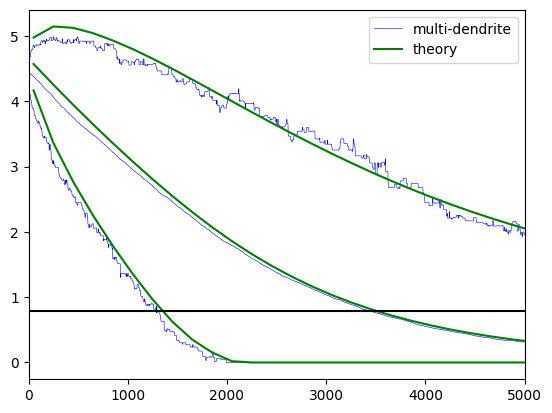

In [40]:
# plt.plot(np.mean(simulation_run.votes_record, axis=0)[:decay_steps]*upper99_2/upper99_1, c="red", linewidth=0.4, label="single-dendrite")
# plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps]*upper99_2/upper99_1, c="red", linewidth=0.4)
# plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps]*upper99_2/upper99_1, c="red", linewidth=0.4)

plt.plot(np.mean(simulation_run2.votes_record, axis=0)[:decay_steps], c="blue", linewidth=0.4, label="multi-dendrite")
plt.plot(np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps], c="blue", linewidth=0.4)
plt.plot(np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps], c="blue", linewidth=0.4)

plt.plot(mean_time_list[:, 0], mean_time_list[:, 1], c="green", label="theory")
plt.plot(lower99_time_list[:, 0], lower99_time_list[:, 1], c="green")
plt.plot(upper99_time_list[:, 0], upper99_time_list[:, 1], c="green")

# plt.hlines(upper99_1, 0, decay_steps, colors="red")
plt.hlines(upper99_2, 0, decay_steps, colors="black")
plt.xlim(0, 5000)
plt.legend()

In [11]:
tmp = (np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps] - upper99_1)
tmp = np.bitwise_and(tmp[:-1]>0, tmp[1:]<0)
print("single-dendrite: ", np.mean(np.argwhere(tmp)))

tmp = (np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps] - upper99_2)
tmp = np.bitwise_and(tmp[:-1]>0, tmp[1:]<0)
print("multi-dendrite: ", np.mean(np.argwhere(tmp)))

single-dendrite:  1282.0
multi-dendrite:  1476.0


In [149]:
ns=300
nd=200
rho = 200
bias = 2.32635
ndR = 2
kappa = 3.
n_votes = 2
vote_th = 0
# la = 0.445556
# beta = 11.5

decay_steps = 30000
n_tested_patterns = 500
initial_steps = 5000

seed = 238238
rng = np.random.default_rng(seed)

# neuron = lib.Neuron10_2(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, ndR=ndR, beta=beta, seed=rng.integers(100000))
neuron3 = lib.Neuron3_2(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, ndR=ndR, n_votes=n_votes, vote_th=vote_th, seed=rng.integers(100000))
# neuron = lib.Neuron4_2(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, la=la, n_votes=n_votes, seed=rng.integers(100000))

# xs_gen = lib.Xs_Generator1(normalized_len=-1, seed=rng.integers(100000))
# xs_gen = lib.Xs_Generator3_1(nd, ns, rho, normalized_len=np.sqrt(ns), seed=rng.integers(100000))
xs_gen = lib.Xs_Generator3_2(nd, ns, rho, normalized_len=np.sqrt(ns), seed=rng.integers(100000))

simulation_run3 = lib.Simulation_Run2(neuron3, xs_gen, decay_steps=decay_steps, initial_steps=initial_steps, n_tested_patterns=n_tested_patterns, refresh_every=500, seed=rng.integers(100000))

In [150]:
simulation_run3.run()

100%|██████████| 30500/30500 [01:16<00:00, 396.86it/s]


In [151]:
upper99_3 = jnp.mean(np.sort(simulation_run3.votes_record, axis=0)[int(n_tested_patterns*0.99), decay_steps-10000:decay_steps])
mean_3_init = jnp.mean(simulation_run3.votes_record, axis=0)[0]
print(upper99_3)
print(mean_3_init)

6.7968774
10.290215


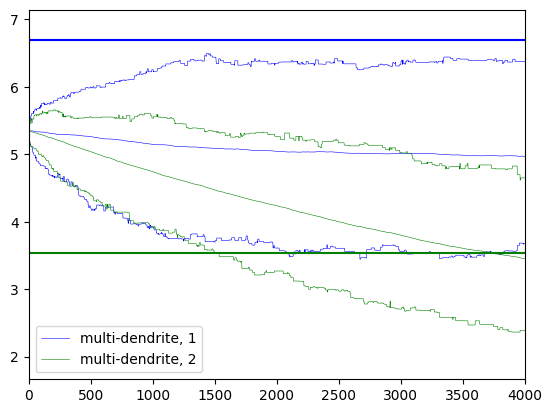

In [154]:
# plt.plot(np.mean(simulation_run.votes_record, axis=0)[:decay_steps], c="red", linewidth=0.4, label="single-dendrite")
# plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps], c="red", linewidth=0.4)
# plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps], c="red", linewidth=0.4)
plt.plot(np.mean(simulation_run2.votes_record, axis=0)[:decay_steps]*mean_1_init/mean_2_init, c="blue", linewidth=0.4, label="multi-dendrite, 1")
plt.plot(np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps]*mean_1_init/mean_2_init, c="blue", linewidth=0.4)
plt.plot(np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps]*mean_1_init/mean_2_init, c="blue", linewidth=0.4)
plt.plot(np.mean(simulation_run3.votes_record, axis=0)[:decay_steps]*mean_1_init/mean_3_init, c="green", linewidth=0.4, label="multi-dendrite, 2")
plt.plot(np.sort(simulation_run3.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps]*mean_1_init/mean_3_init, c="green", linewidth=0.4)
plt.plot(np.sort(simulation_run3.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps]*mean_1_init/mean_3_init, c="green", linewidth=0.4)

# plt.hlines(upper99_1, 0, decay_steps, colors="red")
plt.hlines(upper99_2*mean_1_init/mean_2_init, 0, decay_steps, colors="blue")
plt.hlines(upper99_3*mean_1_init/mean_3_init, 0, decay_steps, colors="green")
plt.xlim(0, 4000)
plt.legend()

g2: -0.1455645974339468


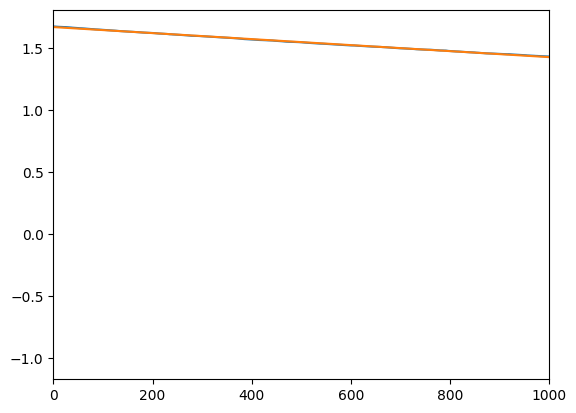

In [90]:
mean_list = np.mean(simulation_run.votes_record, axis=0)[:decay_steps]
plt.plot(np.log(mean_list))
x_reg_max = 1000
tmp = np.vstack([np.arange(x_reg_max), np.ones(x_reg_max)]).T
slope, intercept = np.linalg.lstsq(tmp, np.log(mean_list)[:x_reg_max], rcond=None)[0]
plt.plot(np.arange(x_reg_max)*slope + intercept)
plt.xlim(0, x_reg_max)
print("g2:", slope*2*ns)

g2: -0.135692813113356


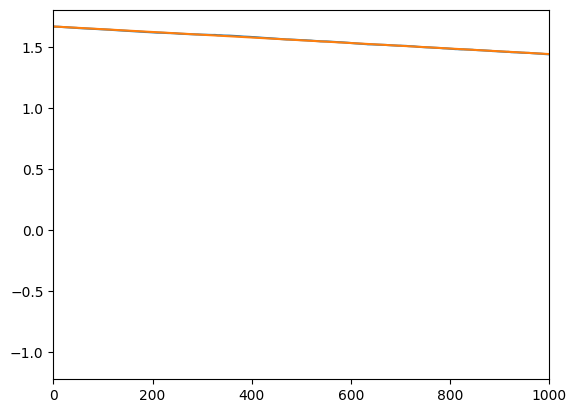

In [91]:
mean_list2 = np.mean(simulation_run2.votes_record, axis=0)[:decay_steps]
plt.plot(np.log(mean_list2))
x_reg_max = 1000
tmp = np.vstack([np.arange(x_reg_max), np.ones(x_reg_max)]).T
slope2, intercept2 = np.linalg.lstsq(tmp, np.log(mean_list2)[:x_reg_max], rcond=None)[0]
plt.plot(np.arange(x_reg_max)*slope2 + intercept2)
plt.xlim(0, x_reg_max)
print("g2:", slope2*2*ns)

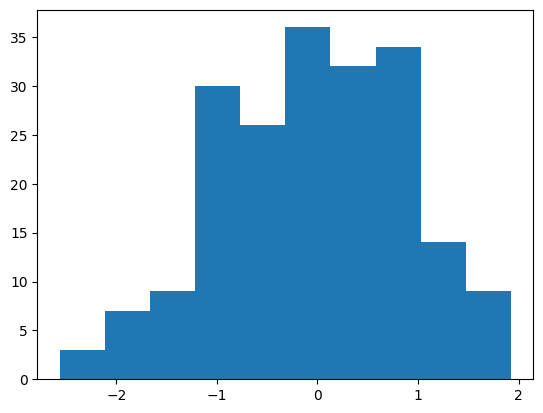

In [14]:
x_tmp = xs_gen.gen(jax.random.PRNGKey(0), (nd, ns))
overlaps = np.sum(neuron.w*x_tmp, axis=-1)
plt.hist(overlaps);

In [21]:
# np.save("data/5.1/votes_same_input_int_mean", np.mean(simulation_run.votes_record, axis=0)[:decay_steps])
# np.save("data/5.1/votes_same_input_int_lower99", np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps])
# np.save("data/5.1/votes_same_input_int_upper99", np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps])

In [5]:
# ns=60000
# nd=1
# bias = 2.32635 
# ndR = 1
# kappa = 3. # ndb=0.4
# la = 0.61310 # ndR = 13

ns=200
nd=300
bias = 2.32635 
ndR = 13
kappa = 0.6774 # ndb=0.4
la = 0.61310 # ndR = 13

decay_steps = 10000
n_tested_patterns = 500
initial_steps = 5000

seed = 23
rng = np.random.default_rng(seed)

# neuron = Neuron0(n_synapses=ns, n_dendrites=nd, bias=bias, seed=rng.integers(100000))
# neuron = Neuron1(n_synapses=ns, n_dendrites=nd, bias=bias, beta1=beta1, beta2=beta2, ndR=ndR, seed=rng.integers(100000))
# neuron = Neuron2(n_synapses=ns, n_dendrites=nd, bias=bias, beta1=beta1, beta2=beta2, la=0.613098, seed=rng.integers(100000))
neuron2 = lib.Neuron3(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, ndR=ndR, seed=rng.integers(100000))
# neuron = lib.Neuron5(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, ndR=ndR, gamma=0., seed=rng.integers(100000))
# neuron = lib.Neuron6(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, ndR=ndR, gamma=0.95, beta=0.*ns, seed=rng.integers(100000))

xs_gen = lib.Xs_Generator1(normalized_len=np.sqrt(ns), seed=rng.integers(100000))

# simulation_run = lib.Simulation_Run_Test(neuron, seed=rng.integers(100000), decay_steps=decay_steps, initial_steps=initial_steps, n_tested_patterns=n_tested_patterns, normalized_xQ=True)
# simulation_run = lib.Simulation_Run(neuron, seed=rng.integers(100000), decay_steps=decay_steps, initial_steps=initial_steps, n_tested_patterns=n_tested_patterns, normalized_xQ=True)
simulation_run4 = lib.Simulation_Run2(neuron2, xs_gen, decay_steps=decay_steps, initial_steps=initial_steps, n_tested_patterns=n_tested_patterns, refresh_every=500, seed=rng.integers(100000))
# simulation_run4 = lib.Simulation_Run4(neuron2, xs_gen, decay_steps=decay_steps, initial_steps=initial_steps, n_tested_patterns=n_tested_patterns, refresh_every=500, seed=rng.integers(100000))

In [6]:
simulation_run4.run()

100%|██████████| 10500/10500 [00:25<00:00, 412.81it/s]


In [9]:
np.mean(np.sort(simulation_run4.overlaps_record, axis=0)[int(n_tested_patterns*0.99), decay_steps-20000:decay_steps])

AttributeError: 'Simulation_Run2' object has no attribute 'overlaps_record'

In [10]:
plt.plot(np.mean(simulation_run4.overlaps_record, axis=0)[:decay_steps], c="red", linewidth=0.4, label="normal")
plt.plot(np.sort(simulation_run4.overlaps_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps], c="red", linewidth=0.4)
plt.plot(np.sort(simulation_run4.overlaps_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps], c="red", linewidth=0.4)

plt.hlines(8, 0, decay_steps)
plt.xlim(0, 3000)

AttributeError: 'Simulation_Run2' object has no attribute 'overlaps_record'

(0.0, 3000.0)

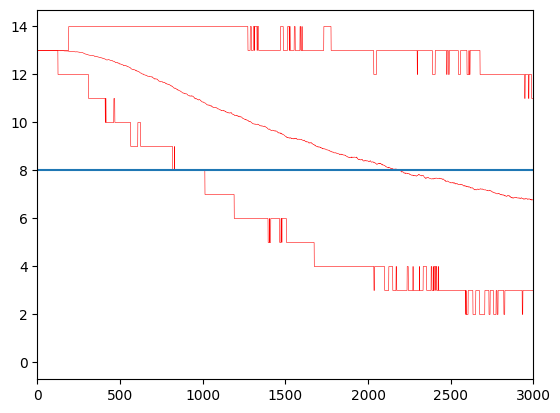

In [11]:
plt.plot(np.mean(simulation_run4.votes_record, axis=0)[:decay_steps], c="red", linewidth=0.4, label="normal")
plt.plot(np.sort(simulation_run4.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps], c="red", linewidth=0.4)
plt.plot(np.sort(simulation_run4.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps], c="red", linewidth=0.4)

plt.hlines(8, 0, decay_steps)
plt.xlim(0, 3000)

In [16]:
meanlist = np.genfromtxt("data/5.1/mean_int.csv", delimiter=",")

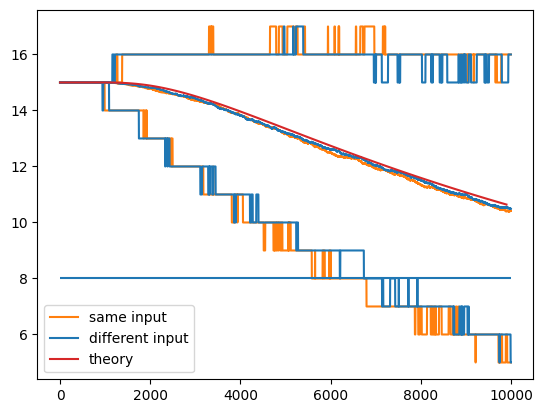

In [19]:
plt.plot(np.mean(simulation_run.votes_record, axis=0)[:decay_steps], c="#ff7f0e", label="same input")
plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps], c="#ff7f0e")
plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps], c="#ff7f0e")

plt.plot(np.mean(simulation_run2.votes_record, axis=0)[:decay_steps], c="#1f77b4", label="different input")
plt.plot(np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps], c="#1f77b4")
plt.plot(np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps], c="#1f77b4")

plt.plot(meanlist[:, 0], meanlist[:, 1], c="#d62728", label="theory")

plt.hlines(8, 0, decay_steps)
# plt.vlines(900, 0, 17)
# plt.xlim(0, 2000)
# plt.ylim(10, 12)
plt.legend()

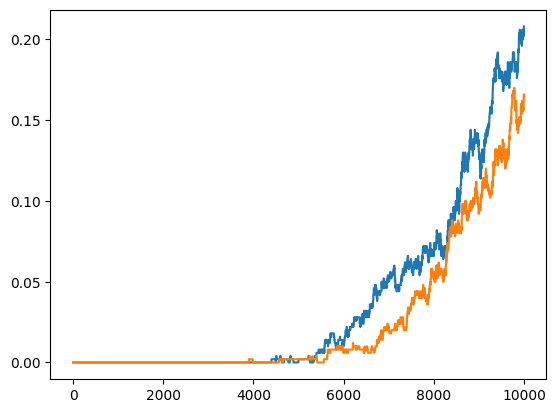

In [41]:
plt.plot(np.mean(simulation_run.votes_record <= n0, axis=0)[:decay_steps])
plt.plot(np.mean(simulation_run2.votes_record <= n0, axis=0)[:decay_steps])

In [38]:
# np.save("data/5.1/false_negative_same_input_int", np.mean(simulation_run.votes_record <= n0, axis=0)[:decay_steps])
# np.save("data/5.1/false_negative_diff_input_int", np.mean(simulation_run2.votes_record <= n0, axis=0)[:decay_steps])

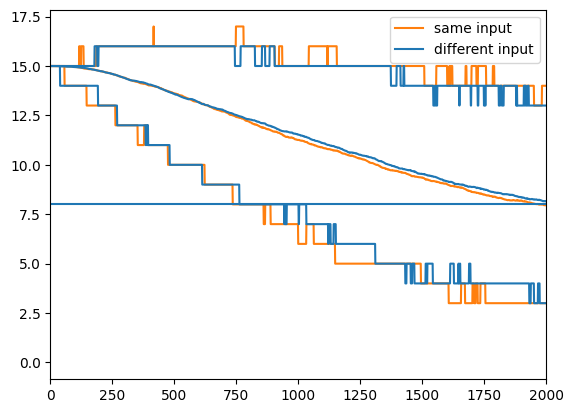

In [55]:
plt.plot(np.mean(simulation_run.votes_record, axis=0)[:decay_steps], c="#ff7f0e", label="same input")
plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps], c="#ff7f0e")
plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps], c="#ff7f0e")

plt.plot(np.mean(simulation_run2.votes_record, axis=0)[:decay_steps], c="#1f77b4", label="different input")
plt.plot(np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps], c="#1f77b4")
plt.plot(np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps], c="#1f77b4")

plt.hlines(8, 0, decay_steps)
# plt.vlines(900, 0, 17)
plt.xlim(0, 2000)
plt.legend()

In [ ]:
# np.save("data/5.1/votes_diff_input_int_mean", np.mean(simulation_run2.votes_record, axis=0)[:decay_steps])
# np.save("data/5.1/votes_diff_input_int_lower99", np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps])
# np.save("data/5.1/votes_diff_input_int_upper99", np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps])

In [63]:
# np.save("data/4/votes_diff_input_int", simulation_run.votes_record)
# np.save("data/4/votes_same_input_int", simulation_run2.votes_record)

In [81]:
np.mean(np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.99), decay_steps-20000:decay_steps])

7.97555

In [23]:
ns=200
nd=300
bias = 2.32635 # ndb=3
beta1 = 1.0
beta2 = 2.12727
ndR = 10
kappa = 0.6774 # ndb=0.4
la = 0.492433 # ndR = 10

decay_steps = 3000
n_tested_patterns = 2000
initial_steps = 5000


# neuron = Neuron0(n_synapses=ns, n_dendrites=nd, bias=bias, seed=11111)
# neuron = Neuron1(n_synapses=ns, n_dendrites=nd, bias=bias, beta1=beta1, beta2=beta2, ndR=ndR, seed=123456)
# neuron = Neuron2(n_synapses=ns, n_dendrites=nd, bias=bias, beta1=beta1, beta2=beta2, la=0.613098, seed=11111)
neuron3 = Neuron4(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, la=la, seed=11111)
simulation_run3 = Simulation_Run(neuron3, seed=123456, decay_steps=decay_steps, initial_steps=initial_steps, n_tested_patterns=n_tested_patterns, normalized_xQ=True)

In [24]:
simulation_run3.run()

100%|██████████| 5000/5000 [01:05<00:00, 76.67it/s] 


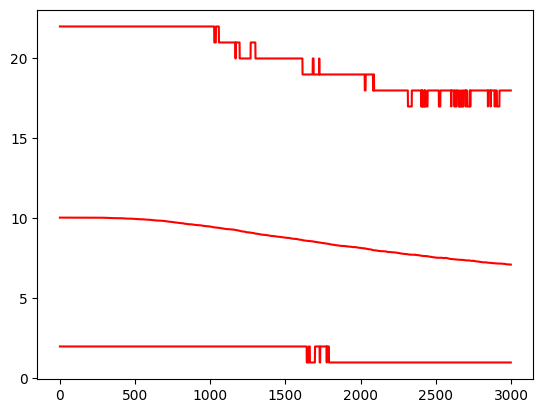

In [25]:
plt.plot(np.mean(simulation_run3.votes_record, axis=0)[:decay_steps], c="red")
plt.plot(np.sort(simulation_run3.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps], c="red")
plt.plot(np.sort(simulation_run3.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps], c="red")

In [84]:
np.mean(np.sort(simulation_run3.votes_record, axis=0)[int(n_tested_patterns*0.99), decay_steps-20000:decay_steps])

11.2402

In [64]:
# np.save("data/4/votes_same_input_non_int", simulation_run3.votes_record)

In [88]:
# np.save("data/1.2/votes_same_input_non_int_mean", np.mean(simulation_run3.votes_record, axis=0)[:decay_steps])
# np.save("data/1.2/votes_same_input_non_int_lower99", np.sort(simulation_run3.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps])
# np.save("data/1.2/votes_same_input_non_int_upper99", np.sort(simulation_run3.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps])

In [26]:
meanlist = np.genfromtxt("data/1.2/mean_int.csv")
lower99list = np.genfromtxt("data/1.2/lower99_int.csv")
upper99list = np.genfromtxt("data/1.2/upper99_int.csv")

# meanlist_non_int = np.genfromtxt("data/mean_non_int.csv")
# lower99list_non_int = np.genfromtxt("data/lower99_non_int.csv")
# upper99list_non_int = np.genfromtxt("data/upper99_non_int.csv")

In [105]:
# votes_record1 = np.load("data/1/votes_diff_input_int.npy")
# votes_record2 = np.load("data/1/votes_same_input_int.npy")
# votes_record3 = np.load("data/1/votes_same_input_non_int.npy")

# votes1_mean = np.mean(votes_record1, axis=0)[:decay_steps]
# votes1_lower99 = np.sort(votes_record1, axis=0)[int(n_tested_patterns*0.01)]
# votes1_upper99 = np.sort(votes_record1, axis=0)[int(n_tested_patterns*0.99), :decay_steps]
# votes2_mean = np.mean(votes_record2, axis=0)[:decay_steps]
# votes2_lower99 = np.sort(votes_record2, axis=0)[int(n_tested_patterns*0.01)]
# votes2_upper99 = np.sort(votes_record2, axis=0)[int(n_tested_patterns*0.99), :decay_steps]
# votes3_mean = np.mean(votes_record3, axis=0)[:decay_steps]
# votes3_lower99 = np.sort(votes_record3, axis=0)[int(n_tested_patterns*0.01)]
# votes3_upper99 = np.sort(votes_record3, axis=0)[int(n_tested_patterns*0.99), :decay_steps]

################################################################################################

votes1_mean = np.load("data/1.2/votes_diff_input_int_mean.npy")
votes1_lower99 = np.load("data/1.2/votes_diff_input_int_lower99.npy")
votes1_upper99 = np.load("data/1.2/votes_diff_input_int_upper99.npy")
votes2_mean = np.load("data/1.2/votes_same_input_int_mean.npy")
votes2_lower99 = np.load("data/1.2/votes_same_input_int_lower99.npy")
votes2_upper99 = np.load("data/1.2/votes_same_input_int_upper99.npy")
votes3_mean = np.load("data/1.2/votes_same_input_non_int_mean.npy")
votes3_lower99 = np.load("data/1.2/votes_same_input_non_int_lower99.npy")
votes3_upper99 = np.load("data/1.2/votes_same_input_non_int_upper99.npy")

ValueError: x and y must have same first dimension, but have shapes (60,) and (800,)

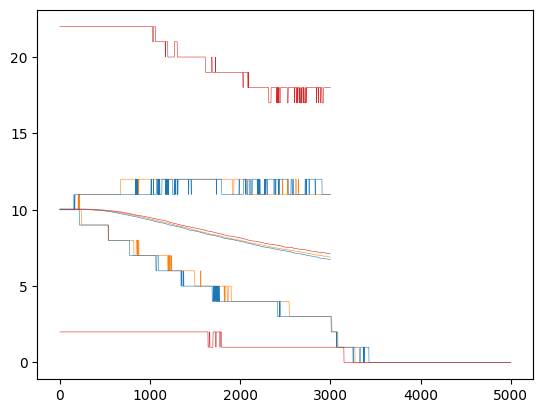

In [32]:
plt.plot(votes1_mean, c="#ff7f0e", linewidth=0.4, label="different input")
plt.plot(votes1_lower99, c="#ff7f0e", linewidth=0.4)
plt.plot(votes1_upper99, c="#ff7f0e", linewidth=0.4)

plt.plot(votes2_mean, c="#1f77b4", linewidth=0.4, label="same input, int")
plt.plot(votes2_lower99, c="#1f77b4", linewidth=0.4)
plt.plot(votes2_upper99, c="#1f77b4", linewidth=0.4)

plt.plot(votes3_mean, c="#d62728", linewidth=0.4, label="same input, non-int")
plt.plot(votes3_lower99, c="#d62728", linewidth=0.4)
plt.plot(votes3_upper99, c="#d62728", linewidth=0.4)

plt.plot(np.arange(0, decay_steps, 50), meanlist, c="#2ca02c", label="theoretical int")
plt.plot(np.arange(0, decay_steps, 50), lower99list, c="#2ca02c")
plt.plot(np.arange(0, decay_steps, 50), upper99list, c="#2ca02c")

# plt.plot(np.arange(0, 50000, 50), meanlist_non_int, c="#9467bd", label="theoretical non-int")
# plt.plot(np.arange(0, 50000, 50), lower99list_non_int, c="#9467bd")
# plt.plot(np.arange(0, 50000, 50), upper99list_non_int, c="#9467bd")

plt.legend()
plt.xlabel("# steps")
plt.ylabel("# active dendrites")

(0.0, 10000.0)

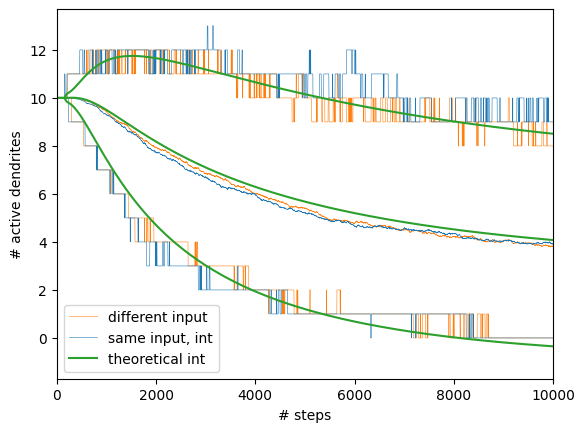

In [98]:
plt.plot(votes1_mean, c="#ff7f0e", linewidth=0.4, label="different input")
plt.plot(votes1_lower99, c="#ff7f0e", linewidth=0.4)
plt.plot(votes1_upper99, c="#ff7f0e", linewidth=0.4)

plt.plot(votes2_mean, c="#1f77b4", linewidth=0.4, label="same input, int")
plt.plot(votes2_lower99, c="#1f77b4", linewidth=0.4)
plt.plot(votes2_upper99, c="#1f77b4", linewidth=0.4)

# plt.plot(votes3_mean, c="#d62728", linewidth=0.4, label="same input, non-int")
# plt.plot(votes3_lower99, c="#d62728", linewidth=0.4)
# plt.plot(votes3_upper99, c="#d62728", linewidth=0.4)

plt.plot(np.arange(0, decay_steps, 50), meanlist, c="#2ca02c", label="theoretical int")
plt.plot(np.arange(0, decay_steps, 50), lower99list, c="#2ca02c")
plt.plot(np.arange(0, decay_steps, 50), upper99list, c="#2ca02c")

# plt.plot(np.arange(0, 50000, 50), meanlist_non_int, c="#9467bd", label="theoretical non-int")
# plt.plot(np.arange(0, 50000, 50), lower99list_non_int, c="#9467bd")
# plt.plot(np.arange(0, 50000, 50), upper99list_non_int, c="#9467bd")


plt.legend()
plt.xlabel("# steps")
plt.ylabel("# active dendrites")
plt.xlim(0, 10000)

In [85]:
tmp = np.random.normal(0, 1/np.sqrt(1000), (1000, ))

In [86]:
np.sum(tmp**2)

0.9810223696095234